In [53]:
%pylab inline
import pandas as pd
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [5]:
lungdata = pd.read_csv('./lungdata.csv')

In [13]:
lungdata.columns

Index([u'ID', u'chrom', u'start', u'end', u'type', u'reference_allele',
       u'alteration_allele', u'deep_Ref_counts_in_normal',
       u'deep_alteration_counts_in_normal', u'deep_Ref_counts_in_tumor',
       u'deep_alteration_counts_in_tumor', u'wes_Ref_counts_in_normal',
       u'wes_alteration_counts_in_normal', u'wes_Ref_counts_in_tumor',
       u'wes_alteration_counts_in_tumor', u'Gene_name', u'Function',
       u'Exonic Function'],
      dtype='object')

In [49]:
parseddata = {} # create a blank holder
for row in lungdata.iterrows():
    patient_id, region_id = row[1]['ID'].split('-') # get region and patient ID

    # create a region if it doesn't exist already
    parseddata[patient_id] = parseddata.get(patient_id, {})
    
    # create an array to hold the snps
    region_snps = parseddata[patient_id].get(region_id, {'structured':[], 'snp_list':[]})
    
    # enter the snp
    AF = row[1]['deep_Ref_counts_in_tumor']
    VAF = row[1]['deep_alteration_counts_in_tumor']
    SNP_ID = str(row[1]['chrom'])+'_'+str(row[1]['start'])
    region_snps['structured'].append({
            'SNPID':SNP_ID,
            'AF': AF, 
            'VAF': VAF,
            '%mutated':(VAF)/float(VAF+AF)})
    region_snps['snp_list'].append(SNP_ID)
    # save it in the array
    parseddata[patient_id][region_id] = region_snps

In [50]:
parseddata

{'270': {'11': {'snp_list': ['1_1916758',
    '1_3417256',
    '1_5624089',
    '1_9777614',
    '1_12726173',
    '1_22333951',
    '1_26231023',
    '1_31437543',
    '1_31437544',
    '1_33772400',
    '1_37325568',
    '1_40717200',
    '1_43785036',
    '1_52281972',
    '1_86822331',
    '1_100740497',
    '1_110121804',
    '1_121482801',
    '1_145440614',
    '1_145587798',
    '1_150523053',
    '1_150955833',
    '1_151377253',
    '1_155057667',
    '1_155262979',
    '1_155646574',
    '1_155936119',
    '1_161127144',
    '1_164762042',
    '1_178381019',
    '1_181702945',
    '1_193039583',
    '1_201020241',
    '1_207651389',
    '1_216680479',
    '1_227946744',
    '1_230933808',
    '1_237666592',
    '2_38537409',
    '2_88485040',
    '2_97589447',
    '2_108921089',
    '2_119731940',
    '2_152361904',
    '2_160269032',
    '2_160284750',
    '2_160661564',
    '2_169870752',
    '2_171702339',
    '2_171807769',
    '2_186659710',
    '2_198361690',
    '2_20

In [51]:
SNPcounts = {}
for patient_id, patient_data in parseddata.items():
    SNPcounts[patient_id] = {}
    for region_id, region_data in patient_data.items():
        SNPcounts[patient_id][region_id] = len(region_data['snp_list'])
        

In [52]:
SNPcounts

{'270': {'11': 271, '12': 278, '13': 275, '14': 268, '15': 242},
 '283': {'12': 27, '14': 27, '15': 28, '17': 28, '18': 26},
 '292': {'11': 60, '14': 59, '16': 58},
 '317': {'11': 3875, '15': 3899, '16': 3879, '17': 3884},
 '324': {'12': 423, '13': 407, '14': 419, '15': 398, '18': 401},
 '330': {'11': 715, '12': 732, '13': 759, '14': 698},
 '339': {'11': 104, '12': 99, '13': 113, '17': 115},
 '356': {'11': 74, '13': 105, '14': 93, '15': 75},
 '472': {'11': 122, '12': 120, '15': 128, '16': 119, '17': 112},
 '499': {'11': 238, '12': 240, '14': 240, '15': 233},
 '4990': {'12': 590, '14': 612, '15': 507, '16': 552, '17': 615}}

In [62]:
seg_sites = {}
for patient_id, patient_data in parseddata.items():
    seg_sites[patient_id] = {}
    total_regions_available = len(patient_data.keys())
    counts = Counter()
#     print 'available regions:',total_regions_available
    
    for region_id, region_data in patient_data.items():
        seg_sites[patient_id][region_id] = 0
        counts.update(region_data['snp_list'])
    
    for region_id, region_data in patient_data.items():
        for snp in region_data['snp_list']:
#             print snp,' count:', counts[snp]
            if counts[snp] != total_regions_available:
                seg_sites[patient_id][region_id] += 1
    
#     for snp, v in counts.items():
#         if v == total_regions_available:
#             continue
#         seg_sites[patient_id] += 1

In [63]:
seg_sites

{'270': {'11': 59, '12': 66, '13': 63, '14': 56, '15': 30},
 '283': {'12': 2, '14': 2, '15': 3, '17': 3, '18': 1},
 '292': {'11': 3, '14': 2, '16': 1},
 '317': {'11': 21, '15': 45, '16': 25, '17': 30},
 '324': {'12': 35, '13': 19, '14': 31, '15': 10, '18': 13},
 '330': {'11': 135, '12': 152, '13': 179, '14': 118},
 '339': {'11': 13, '12': 8, '13': 22, '17': 24},
 '356': {'11': 10, '13': 41, '14': 29, '15': 11},
 '472': {'11': 21, '12': 19, '15': 27, '16': 18, '17': 11},
 '499': {'11': 5, '12': 7, '14': 7, '15': 0},
 '4990': {'12': 169, '14': 191, '15': 86, '16': 131, '17': 194}}

In [64]:
region_locations = {
    '11': (0,0),
    '12': (1,1),
    '13': (1,0),
    '14': (1,-1),
    '15': (2,1),
    '16': (2,0),
    '17': (2,-1),
    '18': (3,0)
}

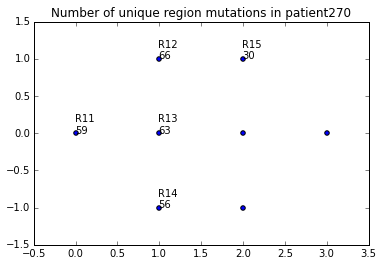

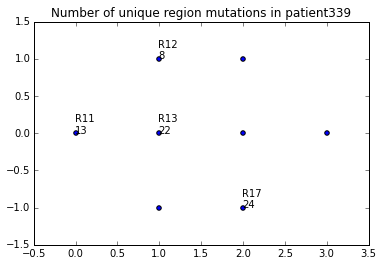

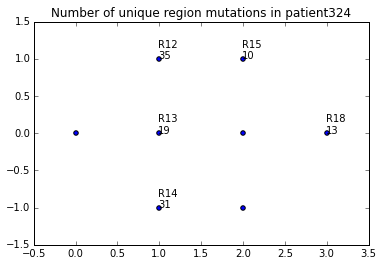

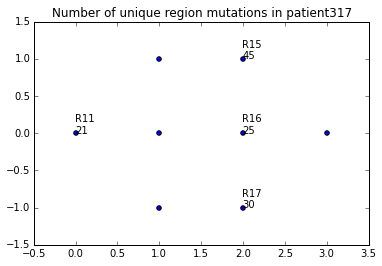

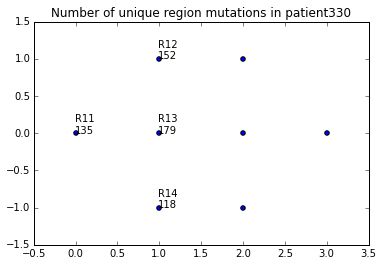

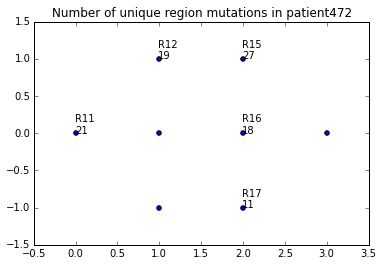

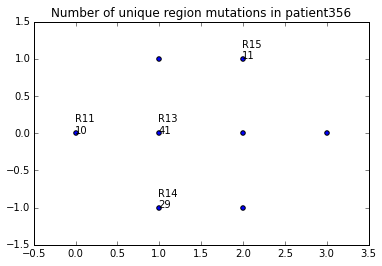

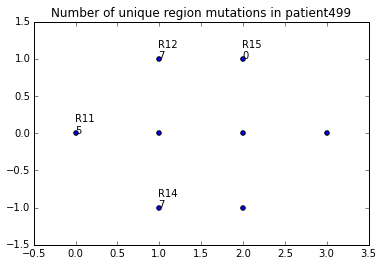

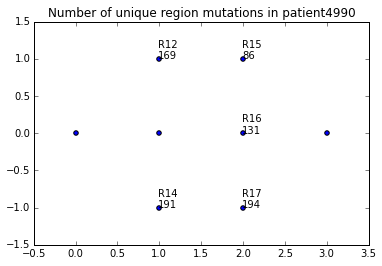

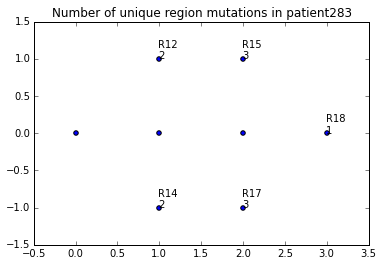

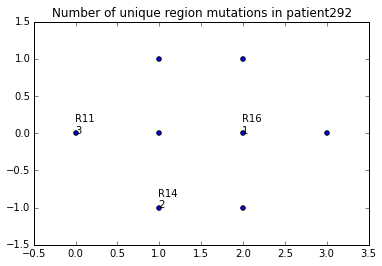

In [75]:
for patient_id, region_data in seg_sites.items():
    plt.figure(patient_id)
    for region_id, region_count in region_data.items():
        x,y = region_locations[region_id]
        plt.text(x,y, 'R'+region_id+'\n'+str(region_count))
    for x,y in region_locations.values():
        plt.scatter(x,y)
    plt.plot(3.05,-1.05,'r')
    plt.plot(-0.05,1.05,'r')
#     plt.plot(1.05,-0.05,'r')
#     plt.plot(1.05,-0.05,'r')
    plt.title('Number of unique region mutations in patient'+patient_id)

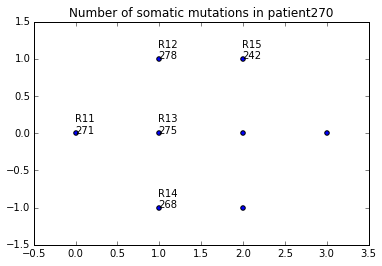

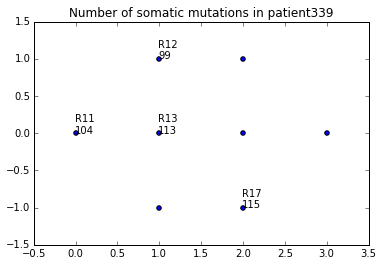

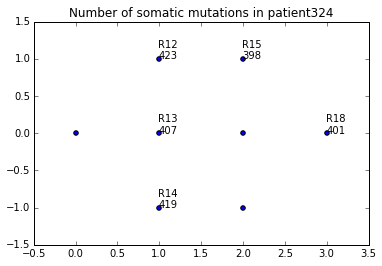

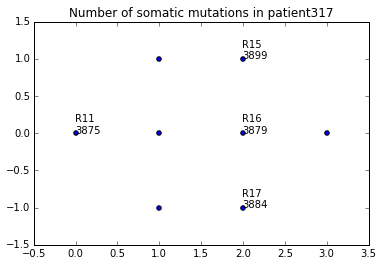

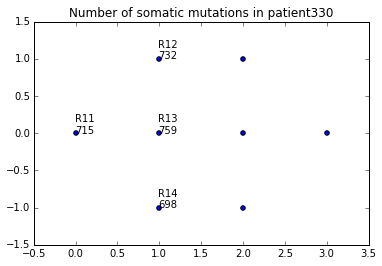

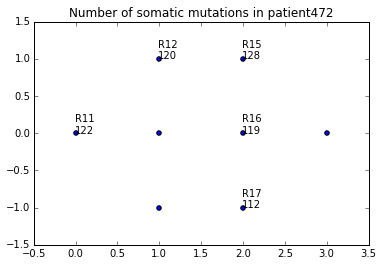

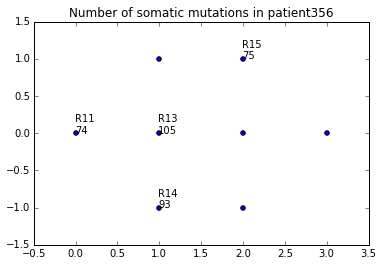

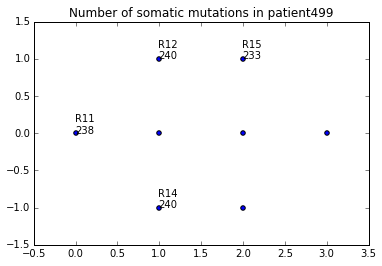

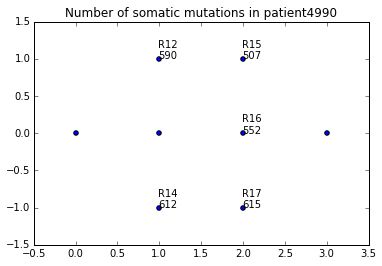

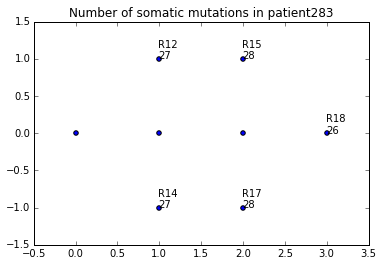

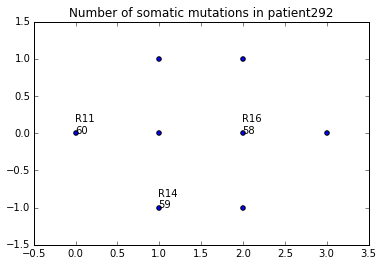

In [77]:
for patient_id, region_data in SNPcounts.items():
    plt.figure(patient_id)
    for region_id, region_count in region_data.items():
        x,y = region_locations[region_id]
        plt.text(x,y, 'R'+region_id+'\n'+str(region_count))
    for x,y in region_locations.values():
        plt.scatter(x,y)
    plt.plot(3.05,-1.05,'r')
    plt.plot(-0.05,1.05,'r')
    plt.title('Number of somatic mutations in patient'+patient_id)